In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Step A: Understand the data (Inspection)

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

#### Converted 0 and 1 values of senior citizen to yes / no to make it easier to understand 

In [10]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


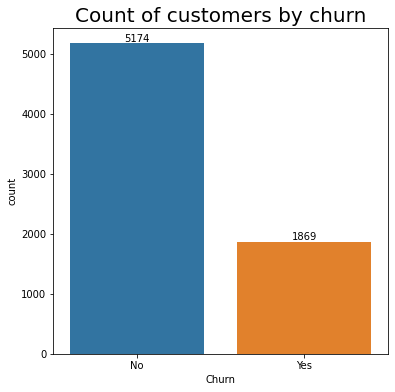

In [11]:
plt.figure(figsize=(6,6))
ax = sb.countplot(x='Churn',data=df)
plt.title('Count of customers by churn',fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

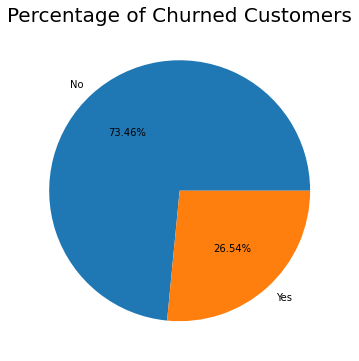

In [12]:
plt.figure(figsize=(6,6))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%.2f%%')
plt.title('Percentage of Churned Customers',fontsize=20)
plt.show()

#### from the given pie chart we can conclude that 26.54% of our customers have churned out.

#### Let's Explore the reason behind it

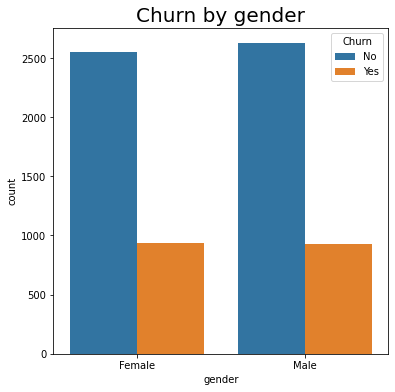

In [13]:
plt.figure(figsize=(6,6))
sb.countplot(x='gender',data=df,hue='Churn')
plt.title("Churn by gender",fontsize=20)
plt.show()

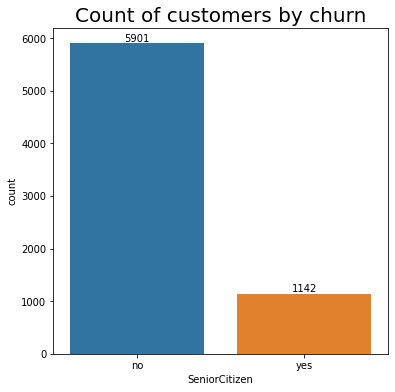

In [14]:
plt.figure(figsize=(6,6))
ax = sb.countplot(x='SeniorCitizen',data=df)
plt.title('Count of customers by Senior Citizen',fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

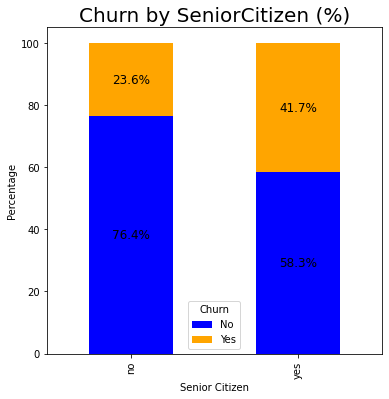

In [15]:
# Step 1: Create a cross-tab (counts)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(6,6), color=['blue','orange'])

# Step 4: Add percentage labels
for i, senior in enumerate(ct_percent.index):
    bottom = 0
    for j, churn in enumerate(ct_percent.columns):
        val = ct_percent.loc[senior, churn]
        ax.text(
            i,                       # x-position
            bottom + val/2,          # y-position (middle of the bar segment)
            f'{val:.1f}%',           # text
            ha='center', va='center',
            color='black', fontsize=12
        )
        bottom += val

plt.title("Churn by SeniorCitizen (%)", fontsize=20)
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title='Churn')
plt.show()


#### Comparative a greater percentage of people in senior citizen category have churned

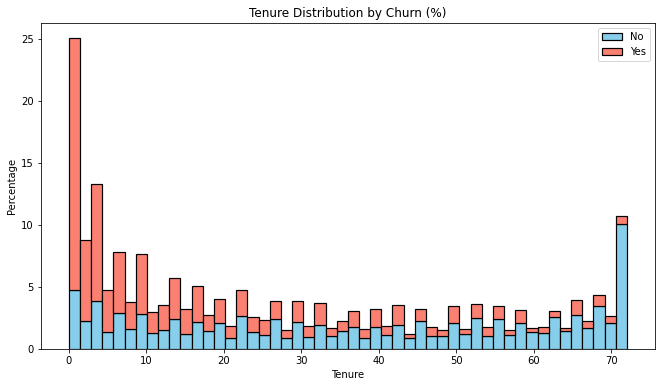

In [21]:
# Separate tenure by Churn
tenure_yes = df[df['Churn']=='Yes']['tenure']
tenure_no  = df[df['Churn']=='No']['tenure']

plt.figure(figsize=(11,6))

plt.hist([tenure_no, tenure_yes], 
         bins=50, 
         stacked=True, 
         color=['skyblue','salmon'], 
         label=['No','Yes'],
         edgecolor='black',   # adds black border to bars
         linewidth=1.2,       # thickness of border
         weights=[np.ones_like(tenure_no)/len(tenure_no)*100, 
                  np.ones_like(tenure_yes)/len(tenure_yes)*100])

plt.title("Tenure Distribution by Churn (%)")
plt.xlabel("Tenure")
plt.ylabel("Percentage")
plt.legend()
plt.show()


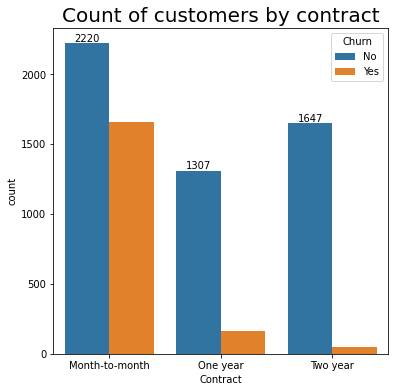

In [24]:
plt.figure(figsize=(6,6))
ax = sb.countplot(x='Contract',data=df,hue='Churn')
plt.title('Count of customers by contract',fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

#### people who have month to month contract are likely to churn then from those who have 1 to 2 years of contract.

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

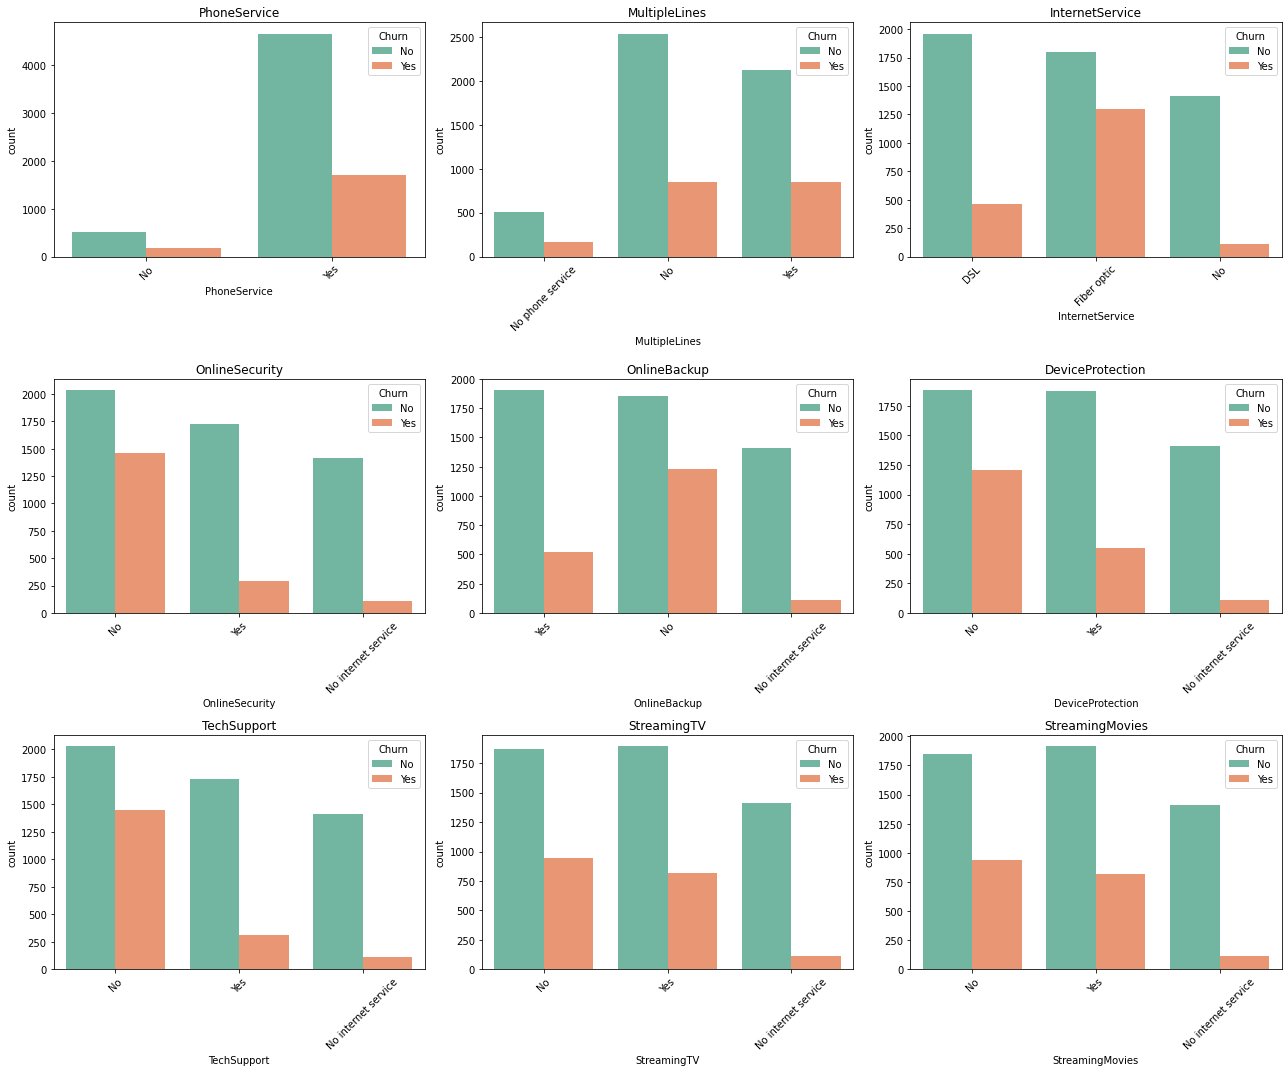

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

# List of columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine grid size: 3x3 (since 9 plots)
n_rows = 3
n_cols = 3

plt.figure(figsize=(18, 15))  # adjust figure size

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sb.countplot(x=col, data=df, palette='Set2', hue='Churn')
    plt.title(col)
    plt.xticks(rotation=45)  # rotate labels if needed

plt.tight_layout()  # adjusts spacing so titles/labels don't overlap
plt.show()

Customers with services like PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies are mostly subscribed to the services (“Yes”), but a significant portion of churned customers tend to have fewer or no subscriptions.

Churned customers (orange bars) are consistently smaller in each category, indicating that lack of these services is associated with higher churn.

Certain services like MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport show a more pronounced difference between churned and non-churned customers, suggesting they may have a stronger impact on retention.

Overall, subscribed services correlate with lower churn, while customers without these services are more likely to leave.

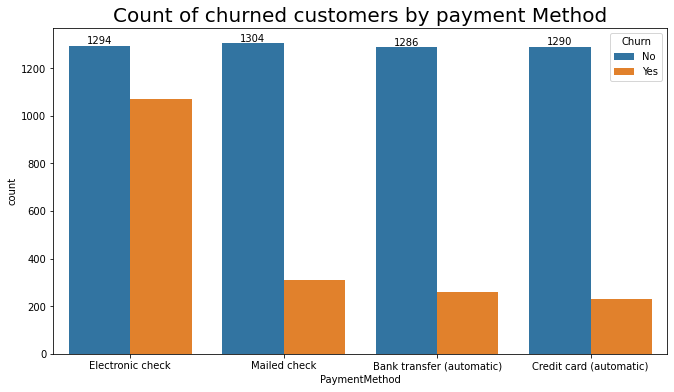

In [35]:
plt.figure(figsize=(11,6))
ax = sb.countplot(x='PaymentMethod',data=df,hue='Churn')
plt.title('Count of churned customers by payment Method',fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()